In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

- 'cp':'Chest Pain Type (CP)'
- 'trestbps':'Resting Blood Pressure (trestbps)',
- 'chol':'Serum Cholestoral (chol) mg/dl',
- 'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
- 'restecg': 'Resting Electrocardiographic Results (restecg)',
- 'thalach' : 'Maximum Heart Rate Achieved (thalach)',
- 'exang': 'Exercise Induced Angina (exang)',
- 'oldpeak' : 'ST depression (oldpeak)' ,
- 'slope' : 'Slope of the ST Segment (slope)',
- 'ca' : 'Number of Major Vessels (ca)',
- 'thal' : 'Thal

In [7]:
df = pd.read_csv("heart_complete.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### EDA

### Histogram (for distribution)

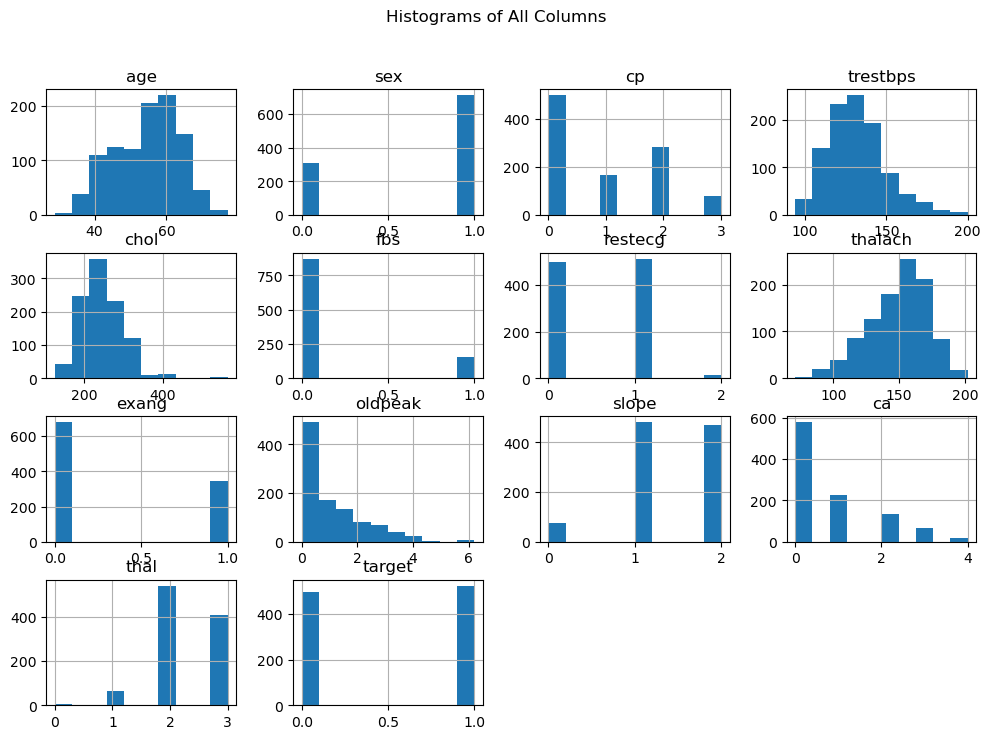

In [13]:
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of All Columns')
plt.show()

### Boxplot (for outlier detection)

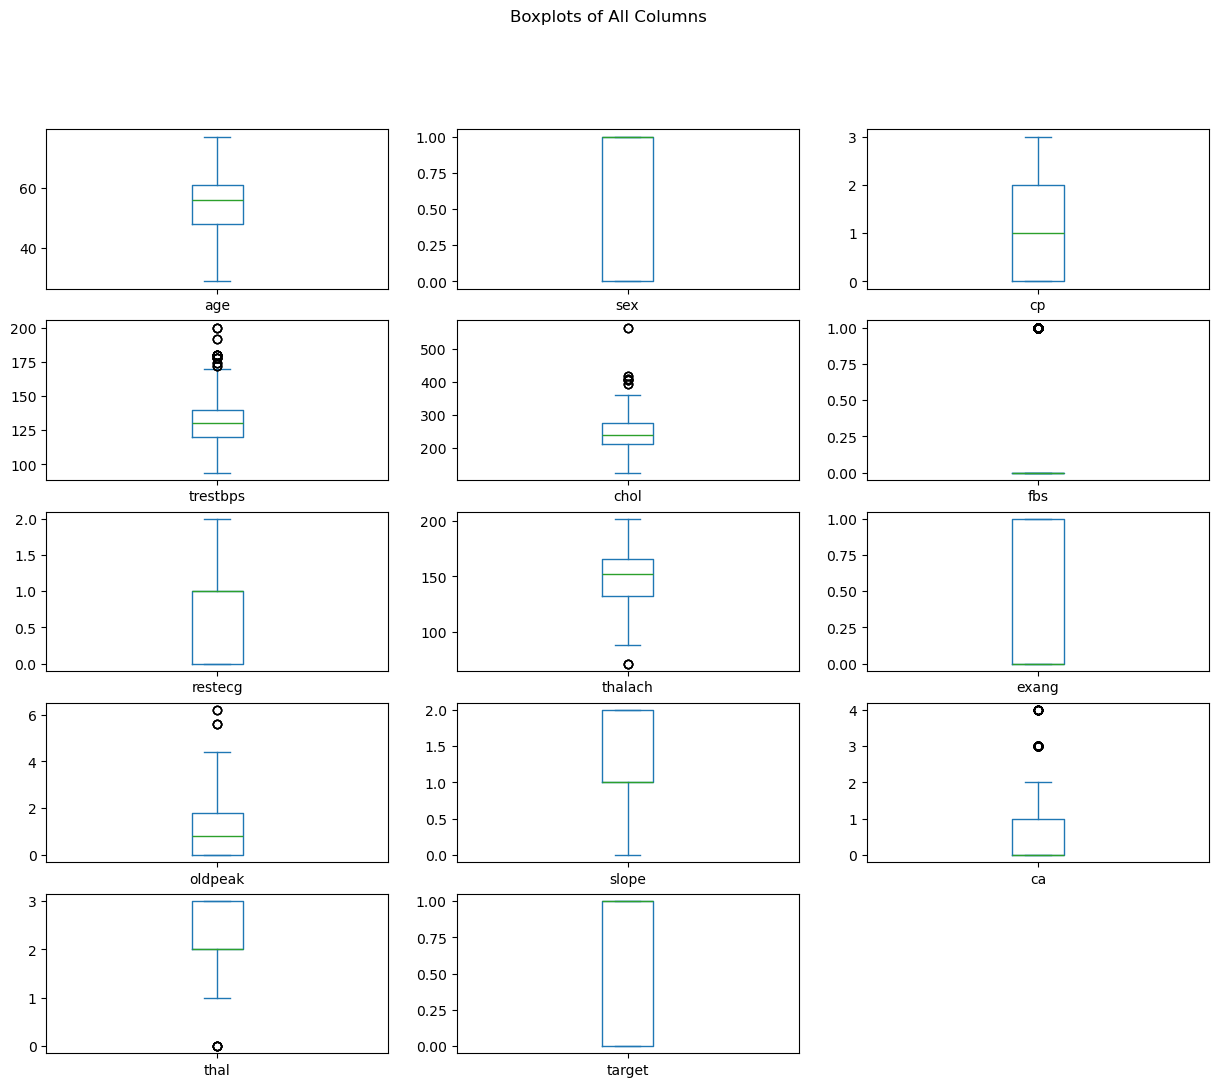

In [15]:
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 12), sharex=False, sharey=False)
plt.suptitle('Boxplots of All Columns')
plt.show()


### Scatter plot matrix (for relationships between variables)

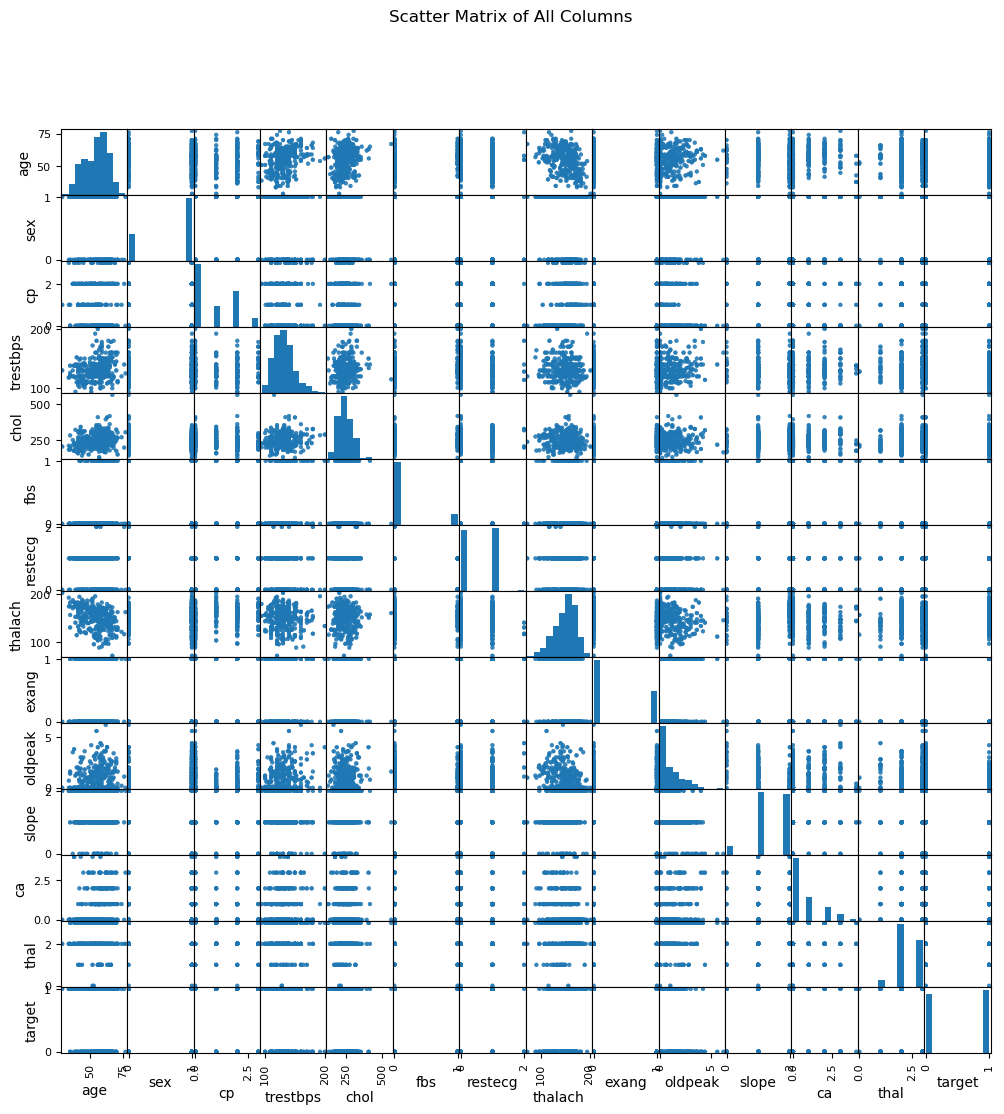

In [17]:
scatter_matrix(df, figsize=(12, 12))
plt.suptitle('Scatter Matrix of All Columns')
plt.show()

### Line plot

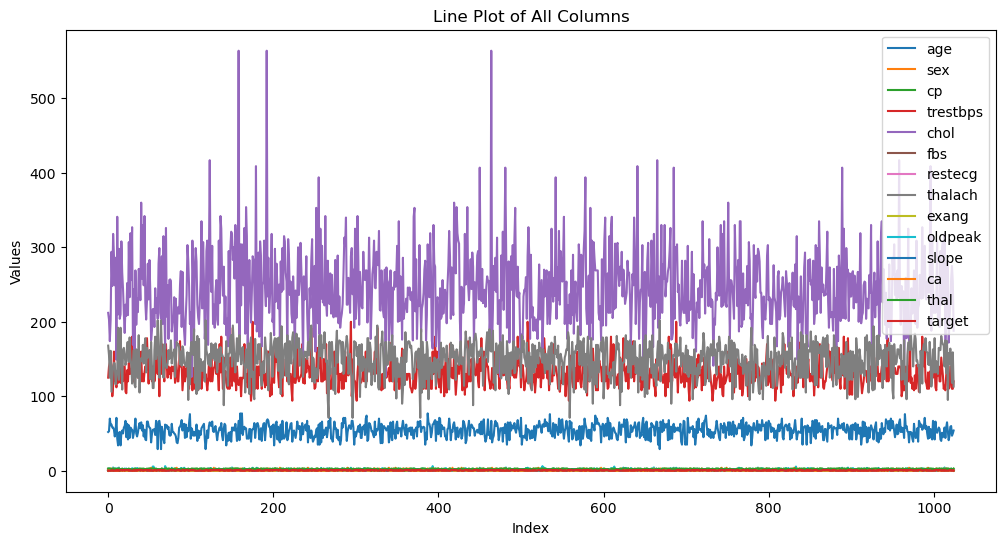

In [19]:
df.plot(kind='line', figsize=(12, 6))
plt.title('Line Plot of All Columns')
plt.xlabel('Index')  # Optional: add an x-axis label if needed
plt.ylabel('Values')  # Optional: add a y-axis label if needed
plt.show()


### Bar plot

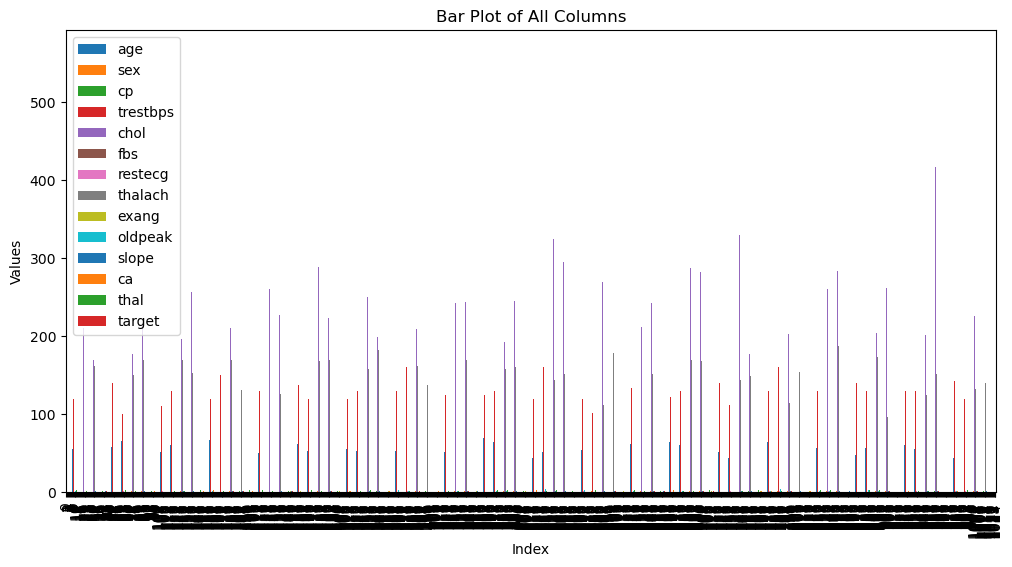

In [21]:
df.plot(kind='bar', figsize=(12, 6))
plt.title('Bar Plot of All Columns')
plt.xlabel('Index')  # Optional: add an x-axis label if needed
plt.ylabel('Values')  # Optional: add a y-axis label if needed
plt.show()


### Correlation heatmap (to show relationships between columns)

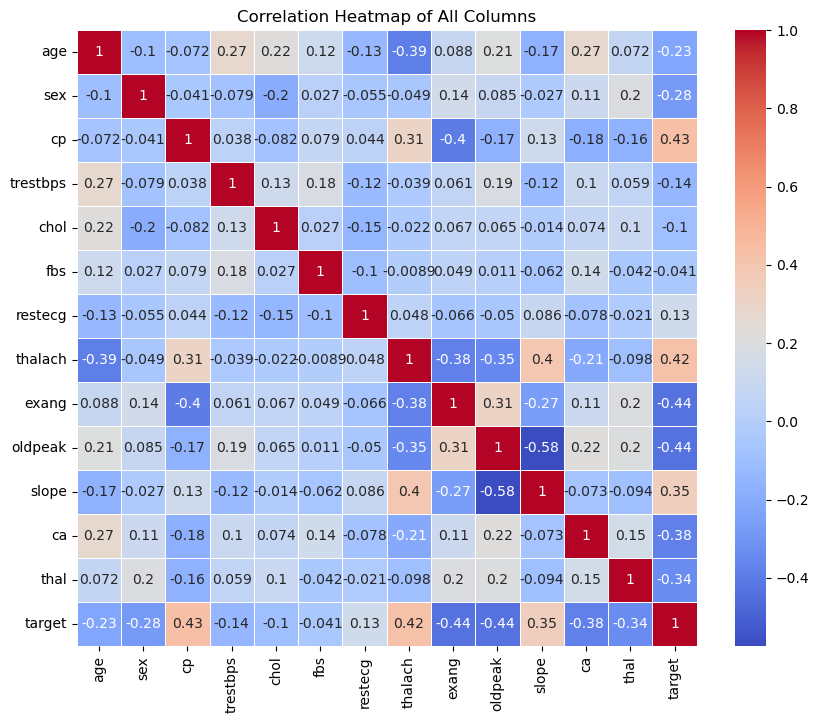

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

### Data modeling

In [25]:
X = df.drop(columns=['target'])
y = df['target']
# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size= 0.2)

In [27]:
# Display the class distribution before and after resampling
print(f"Original dataset shape: {np.bincount(y)}")
print(f"Resampled dataset shape: {np.bincount(y_resampled)}")

Original dataset shape: [499 526]
Resampled dataset shape: [526 526]


In [29]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8768
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       105
           1       0.88      0.88      0.88       106

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211



In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9858
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       1.00      0.97      0.99       106

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211



In [33]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9289
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       105
           1       0.93      0.92      0.93       106

    accuracy                           0.93       211
   macro avg       0.93      0.93      0.93       211
weighted avg       0.93      0.93      0.93       211



In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8815
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       105
           1       0.89      0.88      0.88       106

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211



In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       102

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\user\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       106

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Accuracy: 0.966824644549763
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.98      0.95      0.97       106

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



pip install xgboost


In [41]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       106

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
